# Modelo de clasificación de compilación

In [2]:
import pandas as pd
cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [6]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Un mapa de clasificación
Anteriormente, se aprendio acerca de las distintas opciones que tienes al clasificar los datos usando la hoja de trucos de Microsoft. Scikit-learn ofrece algo similar, pero la hoja de trucos es más granular que puede ayudar a reducir tus estimadores (otro término para clasificadores):

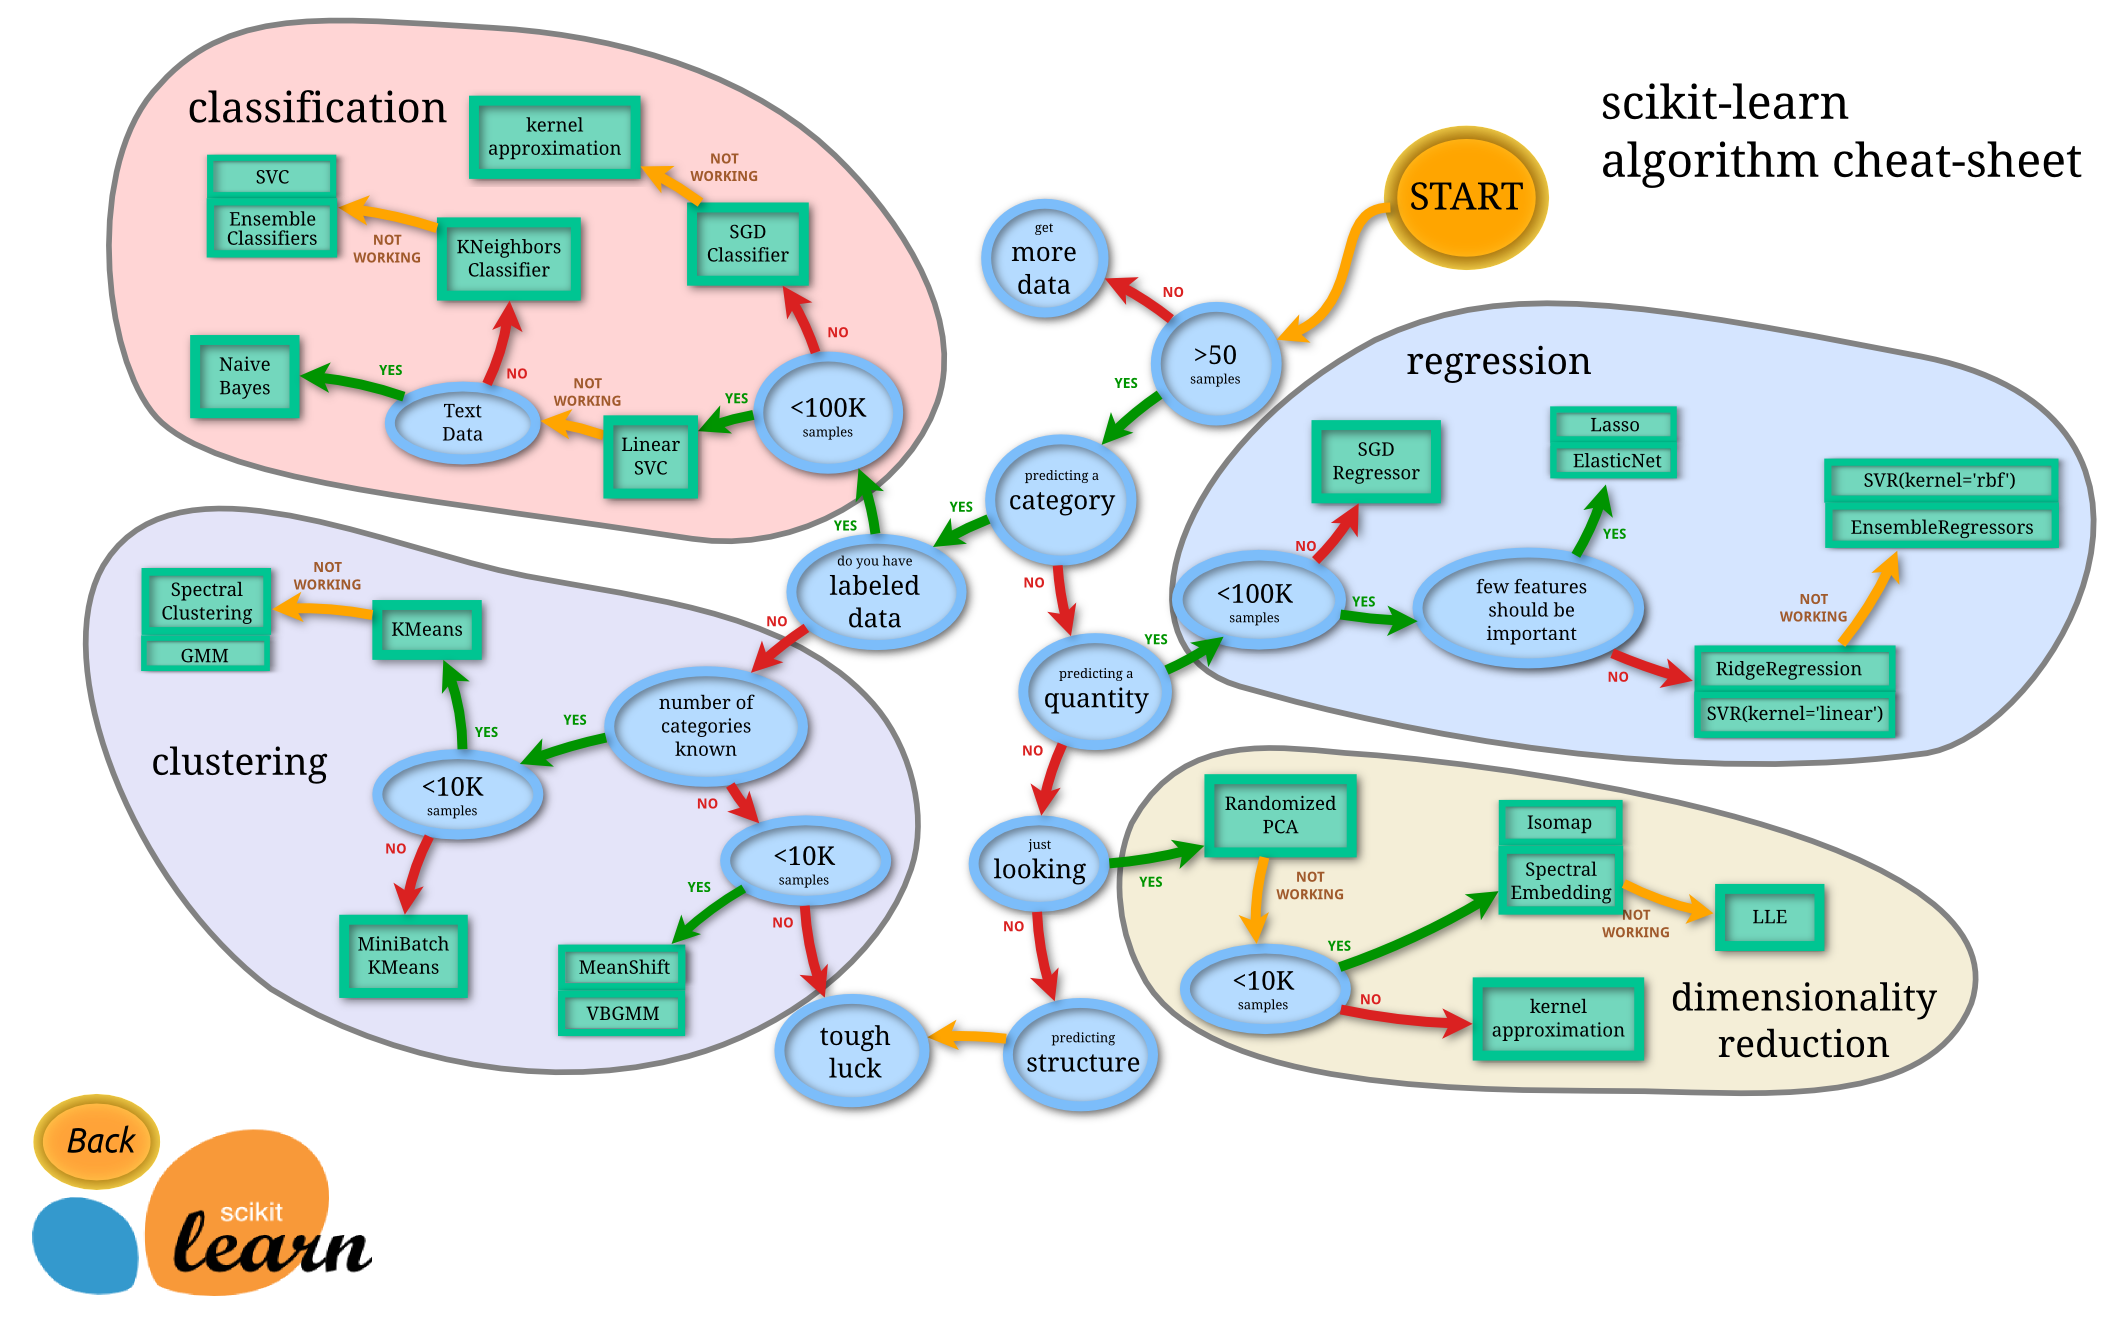

## El plan
Este mapa es muy útil una vez que tengas una compresión clara de tus datos, como puedas 'caminar' junto a sus rutas para una decisión:

* Tenemos >50 muestras
* Queremos predecir una categoría
* Tenemos datos etiquetados
* Tenemos menos de 100K muestras
* ✨ Podemos elegir un SVC lineal
* Si eso no funciona, ya que tenemos datos numéricos
    * Podemos probar un ✨ clasificador KNeighbors
        * Si eso no funciona, intenta los clasificadores ✨ SVC y ✨ conjunto
    
Este es un camino muy útil a seguir.

### Ejercicio - divide los datos
Siguiendo este camino, deberías empezar importando algunas bibliotecas a usar.

1. Importa las bibliotecas necesarias:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

2. Divide tus datos de entrenamiento y prueba:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

## Clasificador lineal SVC
El agrupamiento de vectores de soporte (SVC) es un hijo de la familia de máquinas de vectores de soporte de las técnicas de aprendizaje automático (aprende más acerca de estos más adelante). En este método, puedes elegir un 'kernel' para decidir cómo agrupar las etiquetas. El parámetro 'C' se refiere a 'regularization' el cual regula la influencia de los parámetros. El kernel puede ser uno de varios; aquí lo configuramos a 'linear' para asegurar que aprovechamos la clasificación lineal SVC. La probabilidad por defecto es 'false'; aquí lo configuramos a 'true' para reunir estimaciones de probabilidad. Configuramos el estado aleatorio a '0' para revolver los datos para obtener probabilidades.

### Ejercicio - aplica SVC lineal
Comienza creando un arreglo de clasificadores. Agregarás progresivamente a este arreglo mientras probamos.

1. Empieza con un SVC lineal:

In [17]:
C = 10
# Create different classifiers.
classifiers = {
    # SVC lineal
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0),
    # Clasificador K-Neighbors
    'KNN classifier': KNeighborsClassifier(C),
    # Clasificador de vectores de soporte
    'SVC': SVC(),
    # Clasificadores de conjuntos
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
}

2. Entrena tu modelo usando el SVC lineal e imprime un reporte:

In [19]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 79.2% 
              precision    recall  f1-score   support

     chinese       0.70      0.76      0.73       261
      indian       0.90      0.87      0.89       230
    japanese       0.76      0.79      0.78       231
      korean       0.86      0.73      0.79       242
        thai       0.77      0.82      0.79       235

    accuracy                           0.79      1199
   macro avg       0.80      0.79      0.79      1199
weighted avg       0.80      0.79      0.79      1199

Accuracy (train) for KNN classifier: 72.5% 
              precision    recall  f1-score   support

     chinese       0.67      0.75      0.70       261
      indian       0.83      0.79      0.81       230
    japanese       0.63      0.86      0.73       231
      korean       0.90      0.54      0.68       242
        thai       0.71      0.69      0.70       235

    accuracy                           0.72      1199
   macro avg       0.75      0.73      0.72    

## Clasificador K-Neighbors
K-neighbors es parte de la familia de "vecinos" de métodos de aprendizaje automático, el cual puede ser usado para el aprendizaje supervisado y no supervisado. En este método, se crea un número predefinido de puntos y se reúnen los datos alrededor de estos puntos de modo que se puedan predecir etiquetas generalizadas para los datos.

## Clasificador de vectores de soporte
Los clasificadores de vectores de soporte son parte de la familia de máquinas de vectores de soporte (SVM) de métodos de aprendizaje automático que son usados para las tareas de clasificación y regresión. Los SVMs "asignan ejemplos de entrenamiento a puntos en el espacio" para maximizar la distancia entre dos categorías. Los datos subsecuentes son asignados en este espacio para que su categoría pueda ser predecida.

## Clasificadores de conjuntos
ombinan las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje dado para mejorar generalizabilidad/robustez sobre un único estimador.

Dos ejemplos muy famosos de métodos de conjunto son Random Trees y AdaBoost.

* [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest), un método de promedio, construye un 'bosque' de 'árboles de decisión' infundido con aleatoriedad para evitar sobreajuste. El parámetro n_estimators es configurado a el número de árboles.
* [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) ajusta un clasificador a un conjunto de datos y luego ajusta copias de ese clasificador a el mismo conjunto de datos. Se enfoca en los pesos de los elementos clasificados erróneamente y realiza el ajuste para que el siguiente clasificador lo corrija.